In [ ]:
!pip install pandas


In [17]:
import pandas as pd
df = pd.read_csv('/content/student-scores.csv')
df.head()


id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
df = pd.read_csv('/content/student-scores.csv')
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

In [21]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [22]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0],inplace=True)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
df. isnull().sum()

/tmp/ipython-input-3048444917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
/tmp/ipython-input-3048444917.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [23]:
columns_to_drop = ['id', 'first_name', 'last_name', 'email']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

categorical_cols_to_encode = ['gender', 'career_aspiration']

# Filter for columns that are still in the DataFrame and are of object type
existing_categorical_cols = [col for col in categorical_cols_to_encode if col in df.columns and df[col].dtype == 'object']

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
df.head()

part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours  math_score  history_score  physics_score  \
0                       27          73             81             93   
1                       47          90             86             96   
2                       13          81             97             95   
3                        3          71             74             88   
4                       10          84             77             65   

   chemistry_score  biology_score  english_score  ...  \
0               97             63             80  ...   
1              100             90             88  ...   
2               96             65             77  ...   
3               80             89             63  ...   
4               65             80             74  ...   

   career_aspiration_Game Developer  career_aspiration_Government Officer  \
0                             False                                 False   
1                             False                                 False   
2                             False                                  True   
3                             False                                 False   
4                             False                                 False   

   career_aspiration_Lawyer  career_aspiration_Real Estate Developer  \
0                      True                                    False   
1                     False                                    False   
2                     False                                    False   
3                     False                                    False   
4                     False                                    False   

   career_aspiration_Scientist  career_aspiration_Software Engineer  \
0                        False                                False   
1                        False                                False   
2                        False                                False   
3                        False                                False   
4                        False                                False   

   career_aspiration_Stock Investor  career_aspiration_Teacher  \
0                             False                      False   
1                             False                      False   
2                             False                      False   
3                             False                      False   
4                             False                      False   

   career_aspiration_Unknown  career_aspiration_Writer  
0                      False                     False  
1                      False                     False  
2                      False                     False  
3                      False                     False  
4                       True                     False  

[5 rows x 28 columns]

In [25]:
X = df.drop('math_score', axis=1)
y = df['math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features (all features in X are numerical after one-hot encoding)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Linear Regression model for predicting math_score (a continuous variable)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

Mean Absolute Error (MAE): 8.91
Mean Squared Error (MSE): 121.96
Root Mean Squared Error (RMSE): 11.04
R-squared (R2): 0.27


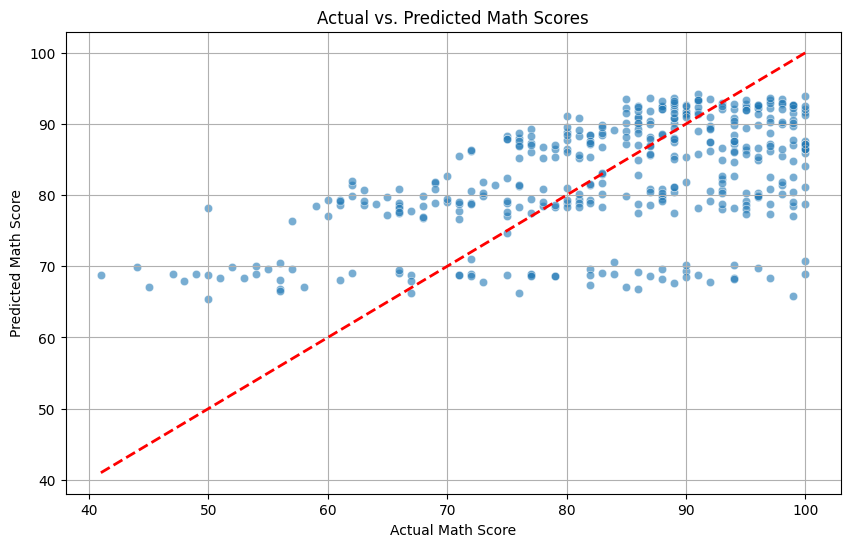

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the Linear Regression model using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line of perfect prediction
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs. Predicted Math Scores')
plt.grid(True)
plt.show()